In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt
import numpy as np

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.3144 - loss: 1.8419 - val_accuracy: 0.5182 - val_loss: 1.3175
Epoch 2/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.5348 - loss: 1.2886 - val_accuracy: 0.5798 - val_loss: 1.1441
Epoch 3/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6020 - loss: 1.1229 - val_accuracy: 0.6238 - val_loss: 1.0462
Epoch 4/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6409 - loss: 1.0078 - val_accuracy: 0.6478 - val_loss: 0.9902
Epoch 5/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.6690 - loss: 0.9340 - val_accuracy: 0.6784 - val_loss: 0.9242
Epoch 6/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6956 - loss: 0.8569 - val_accuracy: 0.6728 - val_loss: 0.9238
Epoch 7/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7173 - loss: 0.8044 - val_accuracy: 0.6682 - val_loss: 0.9546
Epoch 8/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7329 - loss: 0.7685 - val_accuracy: 0

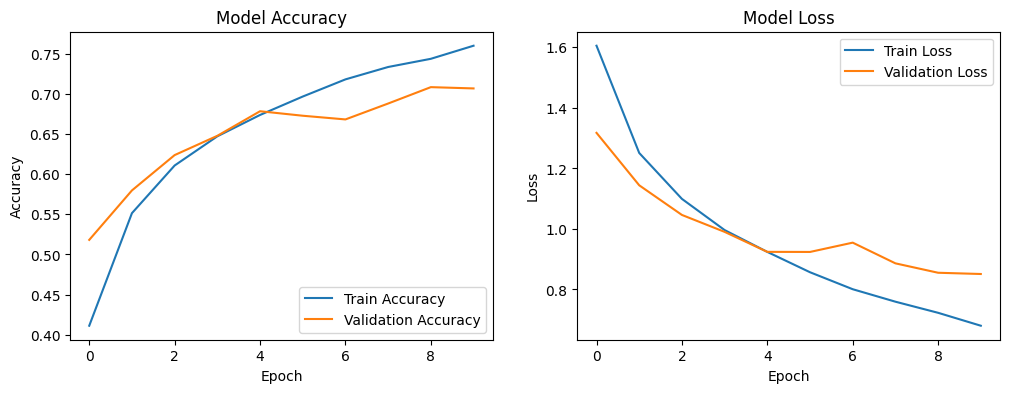

In [2]:


class CNNModel:
    def __init__(self):
        # Load and preprocess the CIFAR-10 dataset
        (self.x_train, self.y_train), (self.x_test, self.y_test) = cifar10.load_data()
        self.x_train = self.x_train.astype('float32') / 255.0
        self.x_test = self.x_test.astype('float32') / 255.0
        self.y_train = tf.keras.utils.to_categorical(self.y_train, num_classes=10)
        self.y_test = tf.keras.utils.to_categorical(self.y_test, num_classes=10)

        # Build the model
        self.model = self.build_model()

    def build_model(self):
        model = models.Sequential([
            layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
            layers.MaxPooling2D((2, 2)),
            layers.Conv2D(64, (3, 3), activation='relu'),
            layers.MaxPooling2D((2, 2)),
            layers.Conv2D(64, (3, 3), activation='relu'),
            layers.Flatten(),
            layers.Dense(64, activation='relu'),
            layers.Dense(10, activation='softmax')
        ])
        model.compile(optimizer='adam',
                      loss='categorical_crossentropy',
                      metrics=['accuracy'])
        return model

    def train(self, epochs=10, batch_size=64):
        # Train the model
        self.history = self.model.fit(self.x_train, self.y_train,
                                       epochs=epochs, batch_size=batch_size,
                                       validation_split=0.1)

    def evaluate(self):
        # Evaluate the model
        test_loss, test_acc = self.model.evaluate(self.x_test, self.y_test)
        print(f'Test accuracy: {test_acc:.4f}')
        return test_loss, test_acc

    def plot_history(self):
        # Plot training & validation accuracy and loss values
        plt.figure(figsize=(12, 4))

        # Accuracy
        plt.subplot(1, 2, 1)
        plt.plot(self.history.history['accuracy'], label='Train Accuracy')
        plt.plot(self.history.history['val_accuracy'], label='Validation Accuracy')
        plt.title('Model Accuracy')
        plt.ylabel('Accuracy')
        plt.xlabel('Epoch')
        plt.legend(loc='lower right')

        # Loss
        plt.subplot(1, 2, 2)
        plt.plot(self.history.history['loss'], label='Train Loss')
        plt.plot(self.history.history['val_loss'], label='Validation Loss')
        plt.title('Model Loss')
        plt.ylabel('Loss')
        plt.xlabel('Epoch')
        plt.legend(loc='upper right')

        plt.show()

    def visualize_predictions(self, num_images=10):
        # Make predictions
        predictions = self.model.predict(self.x_test)

        # Get the predicted classes
        predicted_classes = np.argmax(predictions, axis=1)
        true_classes = np.argmax(self.y_test, axis=1)

        # Plot the images with their predicted and true classes
        plt.figure(figsize=(15, 5))
        for i in range(num_images):
            plt.subplot(2, 5, i + 1)
            plt.imshow(self.x_test[i])
            plt.title(f'True: {true_classes[i]}\nPred: {predicted_classes[i]}')
            plt.axis('off')
        plt.show()

# Example of using the CNNModel class
if __name__ == "__main__":
    cnn_model = CNNModel()
    cnn_model.train(epochs=10, batch_size=64)
    cnn_model.evaluate()
    cnn_model.plot_history()


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


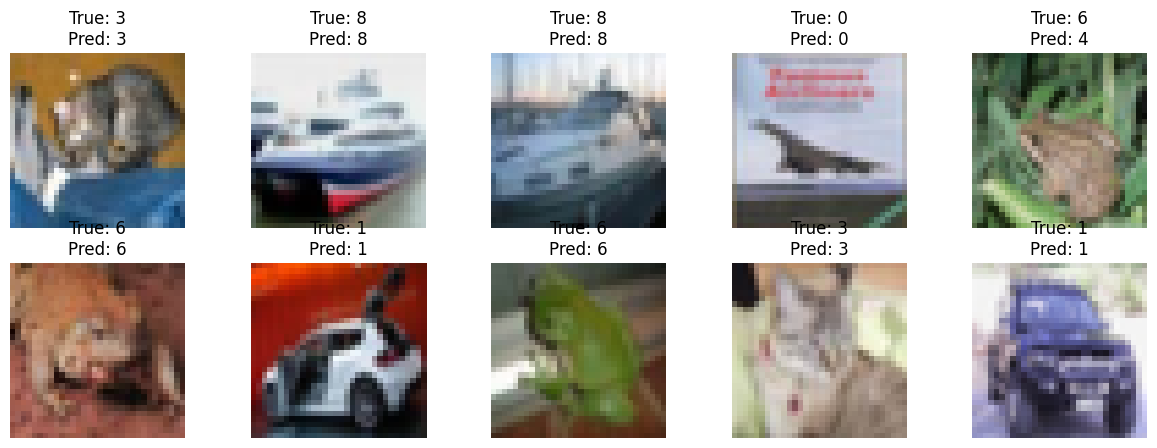

In [3]:
cnn_model.visualize_predictions(num_images=10)
